**Question 9** -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

**Ans**

In [1]:
# Standard Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

# Read the CSV file from the URL
df = pd.read_csv(url)

# Save the DataFrame to a local CSV file
output_file = 'Excel_Csv\Cars.csv'
df.to_csv(output_file, index=False)

In [6]:
# Read Csv file
df = pd.read_csv('Excel_Csv/Cars.csv')
df.head()  # first 5 rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [8]:
print("Shape of data:", df.shape)

Shape of data: (130443, 17)


In [9]:
# Check missing values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [10]:
# Drop missing values
df.dropna(inplace=True)

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [11]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         60402
Eligibility unknown as battery range has not been researched    53108
Not eligible due to low battery range                           16379
Name: count, dtype: int64

In [13]:
not_eligible_clean_alternative_fuel_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']
not_eligible_clean_alternative_fuel_cars_info=not_eligible_clean_alternative_fuel_cars[['Make','Model']]

In [14]:
print(not_eligible_clean_alternative_fuel_cars_info)

          Make        Model
6         FORD       FUSION
7         AUDI         Q5 E
8         FORD        C-MAX
14        FORD        C-MAX
15         KIA         NIRO
...        ...          ...
130377     BMW         530E
130385    AUDI           A3
130390    JEEP     WRANGLER
130407  TOYOTA  PRIUS PRIME
130437     BMW         530E

[16379 rows x 2 columns]


### Get all TESLA cars with the model year, and model type made in Bothell City

Tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
Tesla_cars_bothell_info = Tesla_cars_bothell[['Model Year','Model']]

In [15]:
Tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
Tesla_cars_bothell_info = Tesla_cars_bothell[['Model Year','Model']]

In [16]:
print("TESLA cars with model year and model type made in Bothell City:")
print(Tesla_cars_bothell_info)

TESLA cars with model year and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


###  Get all the cars that have an electric range of more than 100, and were made after 2015

In [17]:
electric_cars_range_100 = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]

In [18]:
print(electric_cars_range_100)

        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      98382.0        2018   
130432  5YJYGDEEXL      King         Vashon    WA      98070.0        2020   
130436  5YJ3E1EB0J   Whatcom         Blaine    WA      98230.0        2018   
130441  5YJXCBE22L    Island  Camano Island    WA      98282.0        2020   

          Make    Model           Electric Vehicle Type  \
0   

### Draw plots to show the distribution between city and electric vehicle type

<Axes: xlabel='count', ylabel='City'>

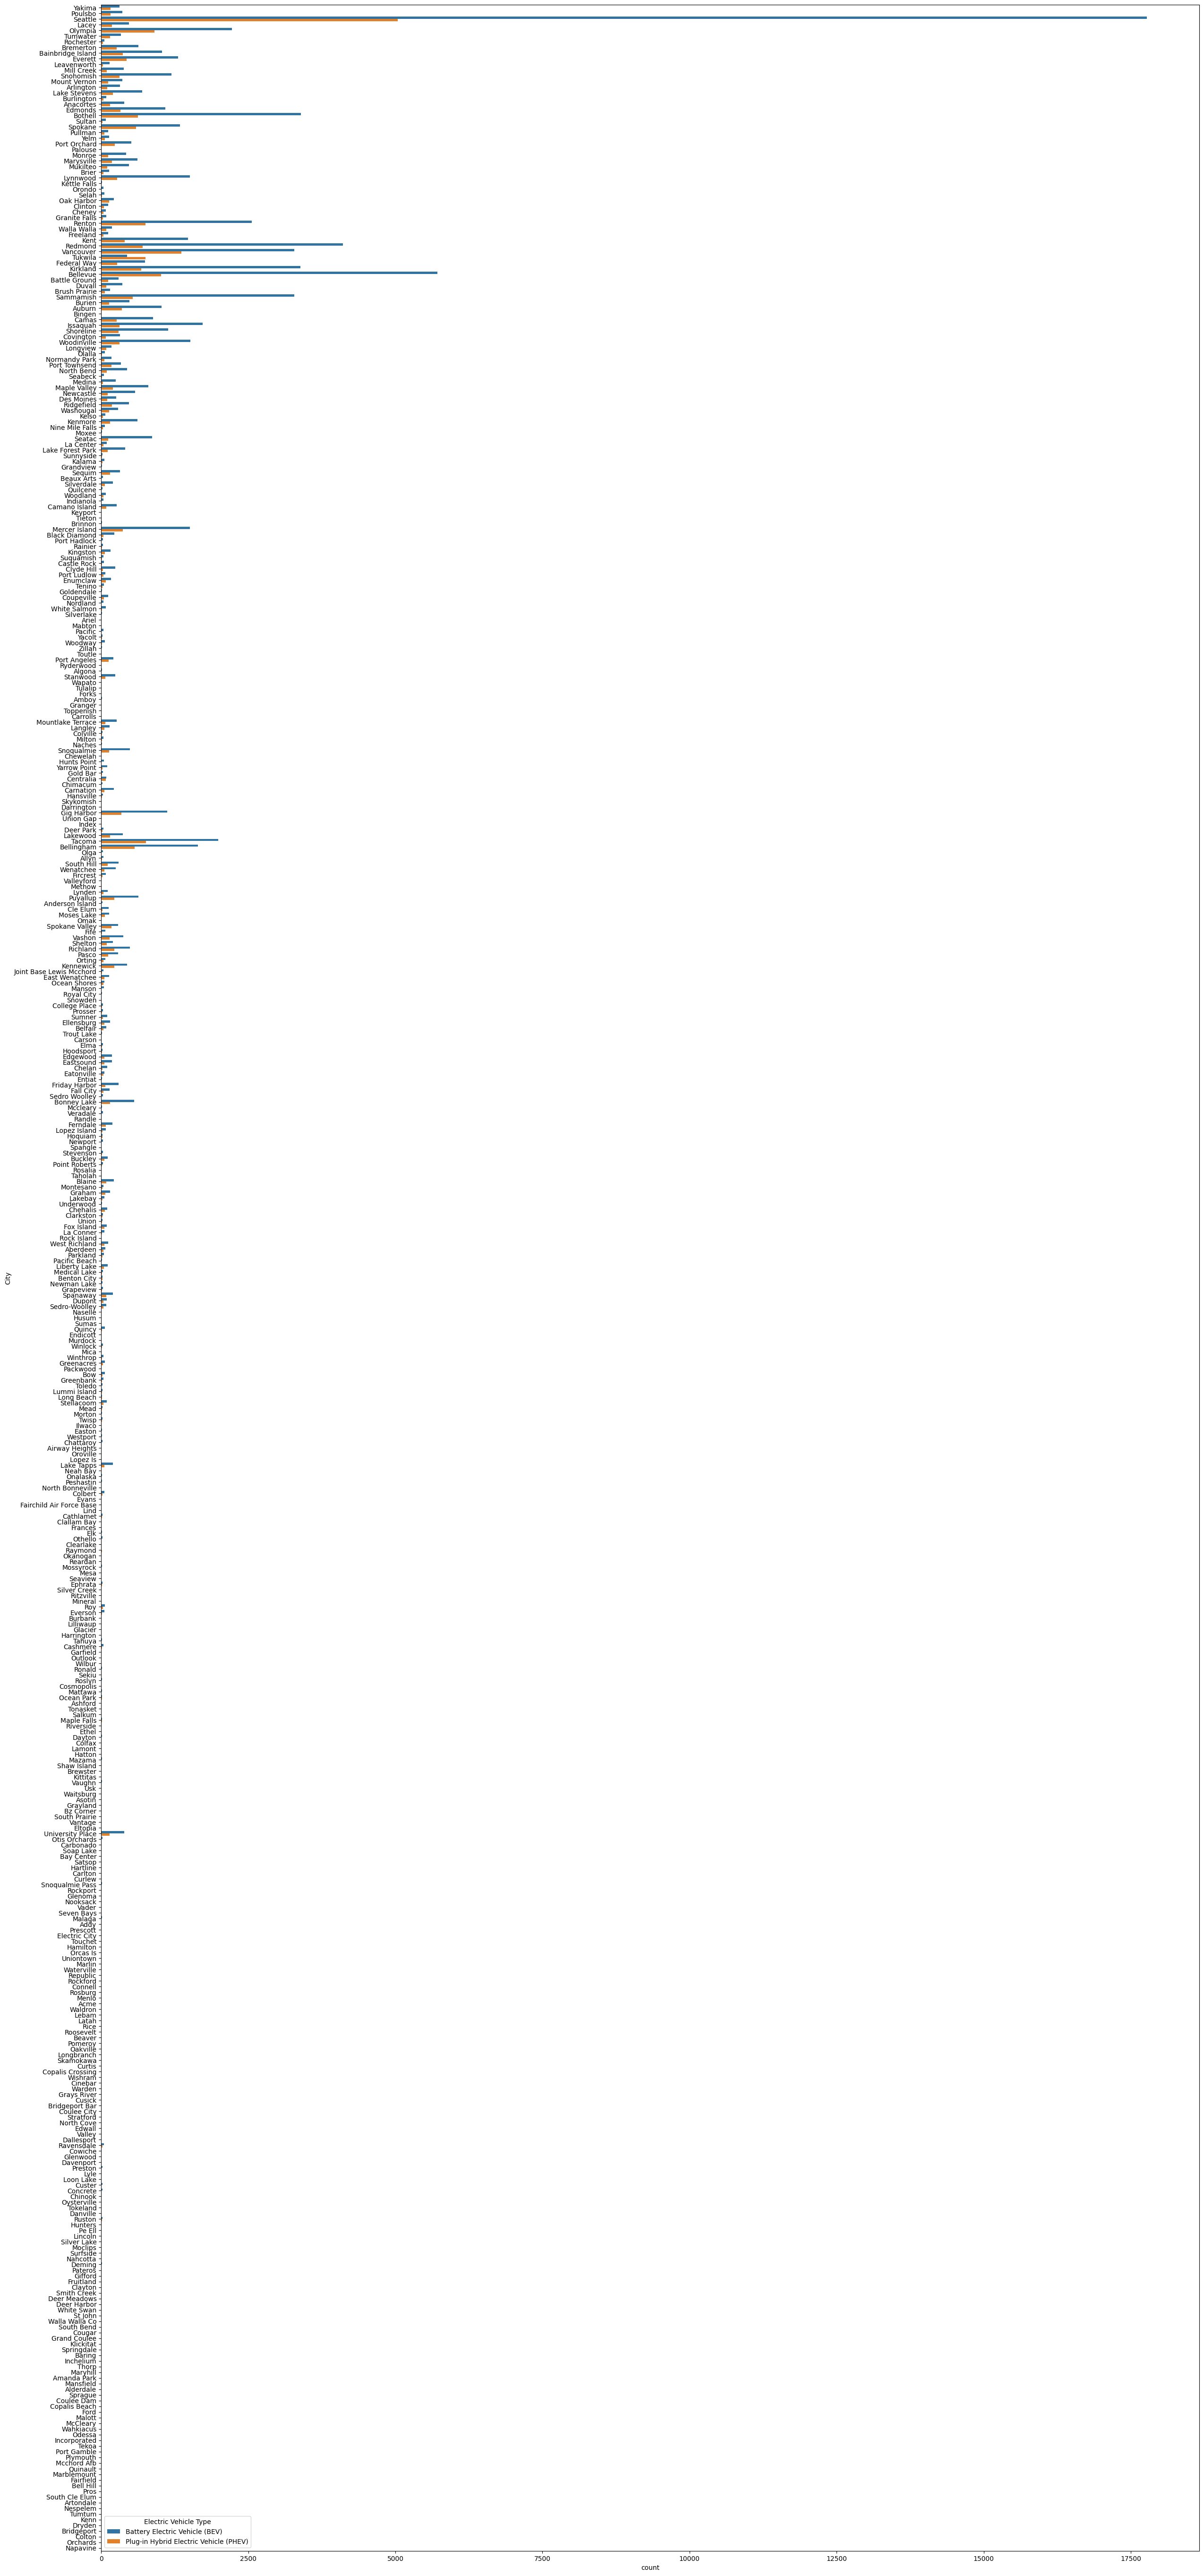

In [19]:
plt.figure(figsize=(30,70))
sns.countplot(y='City', hue= 'Electric Vehicle Type', data = df)